## Multi-node Graph

Imports

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

Sets up the state schema

In [3]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    message: str


Define nodes

In [10]:
def greet_user(state: AgentState) -> AgentState:
    """First node in the Graph"""

    state['message'] = f"\n{state['name']}, welcome to the system! "
    return state

def display_age(state: AgentState) -> AgentState:
    """Second node in the Graph"""

    state['message'] += f"You are {state['age']} years old! "
    return state

def display_skills(state: AgentState) -> AgentState:
    """Third node in the Graph"""

    state['message'] += f"You have skills in {", ".join(state['skills'])}"
    return state

Set-up the Graph and connect nodes

In [12]:
graph = StateGraph(AgentState)

GREET_USER = "greet_user"
DISPLAY_AGE = "display_age"
DISPLAY_SKILLS = "display_skills"

graph.add_node(GREET_USER, greet_user)
graph.add_node(DISPLAY_AGE, display_age)
graph.add_node(DISPLAY_SKILLS, display_skills)

graph.set_entry_point(GREET_USER)
graph.add_edge(GREET_USER, DISPLAY_AGE)
graph.add_edge(DISPLAY_AGE, DISPLAY_SKILLS)
graph.set_finish_point(DISPLAY_SKILLS)

app = graph.compile()

Invoke the Graph with required inputs

In [13]:
result = app.invoke({ "name": "Sudeep", "age": 34, "skills": ["JavaScript", "Python", "React", "Node.js", "AWS"]})

print(result)

print(result["message"])

{'name': 'Sudeep', 'age': 34, 'skills': ['JavaScript', 'Python', 'React', 'Node.js', 'AWS'], 'message': '\nSudeep, welcome to the system! You are 34 years old! You have skills in JavaScript, Python, React, Node.js, AWS'}

Sudeep, welcome to the system! You are 34 years old! You have skills in JavaScript, Python, React, Node.js, AWS


View how the compiled graph looks

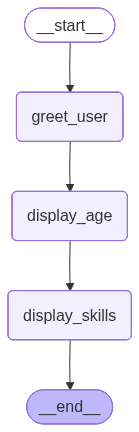

In [8]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))